## Loan Approval Prediction
The dataset provided is for a loan approval prediction task. 

The goal is to analyze which factors affect the result of loan approval. 

The dataset includes various features such as gender, marital status, number of dependents, education, applicant income, credit history, loan amount, loan amount term, property area, and loan status. 

The main objective is to build a predictive model to understand the relationship between these features and the likelihood of a loan being approved.

In [176]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [177]:
df = pd.read_csv('finance-loan-approval-prediction-data.csv', index_col = 0)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


The dataset is a sample from Loan Approval Prediction data from Kaggle. 

Here is the independent variables:

1.Gender - Male/ Female

2.Married - Applicant married (Y/N)

3.Dependents - Number of dependents

4.Education - Applicant Education (Graduate/ Under Graduate)

5.ApplicantIncome - Applicant income

6.Credit_History - credit history meets guidelines

7.LoanAmount - Loan amount in thousands

Below is the dependent variable:

Loan_Status - Loan approved (Y/N)    
    

In [178]:
df_logit = df[['Gender', 'Married', 'Dependents', 'Education', 'ApplicantIncome', 'Credit_History', 'LoanAmount']]

df_logit.head()

,Gender,Married,Dependents,Education,ApplicantIncome,Credit_History,LoanAmount
Loan_ID,,,,,,,
LP001002,Male,No,0,Graduate,5849,1.0,NaN
LP001003,Male,Yes,1,Graduate,4583,1.0,128.0
LP001005,Male,Yes,0,Graduate,3000,1.0,66.0
LP001006,Male,Yes,0,Not Graduate,2583,1.0,120.0
LP001008,Male,No,0,Graduate,6000,1.0,141.0


In [179]:
df = pd.read_csv('finance-loan-approval-prediction-data.csv', index_col = 0)
df.loc[df["Dependents"] == "3+", "Dependents"] = 4

df = df[['Loan_Status','Gender', 'Married', 'Dependents', 'Education', 'ApplicantIncome', 'Credit_History', 'LoanAmount']] 
df = df.dropna()

df['Gender'] = 1 * (df['Gender'] == "Male")
df['Married'] = 1 * (df['Married'] == "Yes")
df['Education'] = 1* (df['Education'] == "Graduate")
df['Loan_Status'] = 1* (df['Loan_Status'] == "Y")
df = df.apply(pd.to_numeric)

Y = df['Loan_Status']
X = df[['Gender', 'Married', 'Dependents', 'Education', 'ApplicantIncome', 'Credit_History', 'LoanAmount']] 
X = sm.add_constant(X)

print(Y)
print(X)


Loan_ID
LP001003    0
LP001005    1
LP001006    1
LP001008    1
LP001011    1
           ..
LP002978    1
LP002979    1
LP002983    1
LP002984    1
LP002990    0
Name: Loan_Status, Length: 518, dtype: int64
          const  Gender  Married  Dependents  Education  ApplicantIncome  \
Loan_ID                                                                    
LP001003    1.0       1        1           1          1             4583   
LP001005    1.0       1        1           0          1             3000   
LP001006    1.0       1        1           0          0             2583   
LP001008    1.0       1        0           0          1             6000   
LP001011    1.0       1        1           2          1             5417   
...         ...     ...      ...         ...        ...              ...   
LP002978    1.0       0        0           0          1             2900   
LP002979    1.0       1        1           4          1             4106   
LP002983    1.0       1        1 

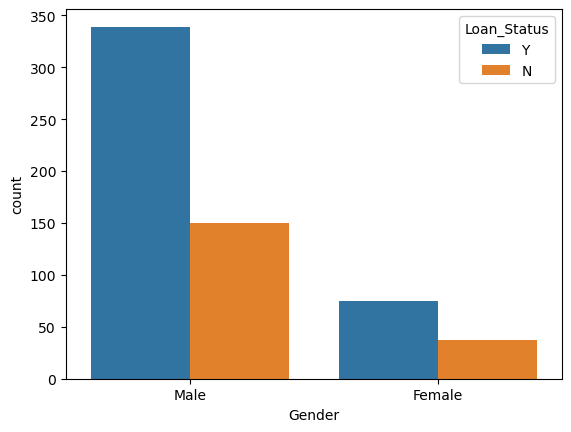

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Gender', hue='Loan_Status', data=df)
plt.show()

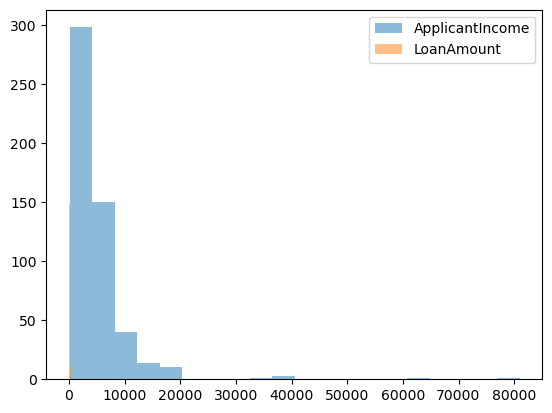

In [180]:
plt.hist(df['ApplicantIncome'], bins=20, alpha=0.5, label='ApplicantIncome')
plt.hist(df['LoanAmount'].dropna(), bins=20, alpha=0.5, label='LoanAmount')
plt.legend(loc='upper right')
plt.show()

In [181]:
model = sm.Logit(Y,X)
result = model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.460730
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  518
Model:                          Logit   Df Residuals:                      510
Method:                           MLE   Df Model:                            7
Date:                Fri, 15 Dec 2023   Pseudo R-squ.:                  0.2509
Time:                        22:40:52   Log-Likelihood:                -238.66
converged:                       True   LL-Null:                       -318.60
Covariance Type:            nonrobust   LLR p-value:                 3.394e-31
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.7531      0.535     -5.144      0.000      -3.802      -1.704
Gender        

## << Result >>

**Constant (const):**
Coefficient: -2.7531

Interpretation: When all other predictor variables are zero (for categorical variables, this typically means the reference category), the log-odds of the loan being approved is estimated to be -2.7531.

**Gender:**
Coefficient: 0.1407

Interpretation: A one-unit increase in the Gender variable is associated with a 0.1407 increase in the log-odds of the loan being approved. However, the p-value (0.643) suggests that this variable is not statistically significant.

**Married:**
Coefficient: 0.5497

Interpretation: Being married is associated with a 0.5497 increase in the log-odds of the loan being approved. The p-value (0.040) indicates that this variable is statistically significant at the 0.05 significance level.

**Dependents:**
Coefficient: 0.0631

Interpretation: A one-unit increase in the number of dependents is associated with a 0.0631 increase in the log-odds of the loan being approved. However, the p-value (0.559) suggests that this variable is not statistically significant.

**Education:**
Coefficient: 0.3448

Interpretation: Having higher education is associated with a 0.3448 increase in the log-odds of the loan being approved. However, the p-value (0.222) suggests that this variable is not statistically significant.

**ApplicantIncome:**
Coefficient: 1.144e-05

Interpretation: A one-unit increase in ApplicantIncome is associated with a 1.144e-05 increase in the log-odds of the loan being approved. The p-value (0.619) suggests that this variable is not statistically significant.

**Credit_History:**
Coefficient: 3.7473

Interpretation: A one-unit increase in Credit_History is associated with a substantial 3.7473 increase in the log-odds of the loan being approved. The low p-value (0.000) indicates that this variable is highly statistically significant.

**LoanAmount:**
Coefficient: -0.0030

Interpretation: A one-unit increase in LoanAmount is associated with a -0.0030 decrease in the log-odds of the loan being approved. The p-value (0.074) is close to 0.05, suggesting that this variable is marginally significant.

In [197]:
data = X
data['Loan_Status'] = Y
data = data.to_numpy()

def rep_utility(data, b0, b1, b2, b3, b4, b5, b6, b7):
    V_n=b0*data[0] +b1*data[1] +b2*data[2] +b3*data[3] +b4*data[4] +b5*data[5] +b6*data[6] +b7*data[7]
    return V_n

def sigmoid(z):
    predict_prob=1/(1.00001+np.exp(-z)) # .00001 to prevent division by 0
    return predict_prob

def LL_mn(beta):
    ll=0
    for x in data:
        ll+=x[8]*np.log(sigmoid(rep_utility(x, beta[0], beta[1], beta[2], beta[3], beta[4], beta[5], beta[6], beta[7])))+(1-x[8])*np.log(1-sigmoid(rep_utility(x, beta[0], beta[1], beta[2], beta[3], beta[4], beta[5], beta[6],beta[7])))
    return -ll

# Initial guess for parameters
initial_params = [0,0,0,0,0,0,0,0,0]

# Performing the optimization
result = optimize.minimize(LL_mn, initial_params)
result["x"]

array([-2.75305874e+00,  1.40668999e-01,  5.49726684e-01,  6.30752802e-02,
        3.44842656e-01,  1.14240611e-05,  3.74731033e+00, -2.95012795e-03,
        0.00000000e+00])

## OVERALL INTERPRETATION

>>Variables with statistically significant coefficients (Married and Credit_History) have meaningful impacts on the likelihood of loan approval, while other variables may have less substantial or statistically insignificant effects.